In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
onlinefraud=pd.read_csv(r"onlinefraud.csv")

In [5]:
onlinefraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
payment=pd.read_csv(r"payment.csv")

In [5]:
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
payment.shape

(6362620, 11)

In [7]:
payment.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
payment.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
dist=payment["type"].unique()

In [19]:
dist

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [21]:
payment["type"] = payment["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [20]:
correlation = payment.select_dtypes(include=['number']).corr()

In [30]:
correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

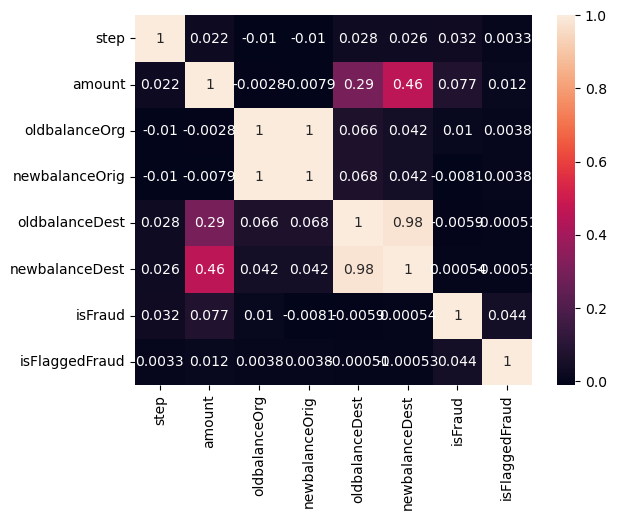

In [35]:
sns.heatmap(correlation,annot=True)

In [36]:
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [70]:
payment["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [71]:
payment["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [22]:
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [50]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE()

In [61]:
resampled_x,resampled_y=smote.fit_resample(payment[["type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]],payment[["isFraud"]])

C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [66]:
resampled_y.value_counts()

isFraud
0          6354407
1          6354407
Name: count, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(resampled_x, resampled_y, test_size=0.20, random_state=42)

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [69]:
model = DecisionTreeClassifier(max_leaf_nodes=20)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_leaf_nodes=20)

In [72]:
model.score(xtest, ytest)

0.9895977713107005

In [73]:
model.score(xtrain, ytrain)

0.9895653124981866

In [74]:
ypredict=model.predict(xtest)

In [75]:
print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270837
           1       0.98      1.00      0.99   1270926

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



[Text(0.59, 0.9444444444444444, 'x[2] <= 53064.008\ngini = 0.5\nsamples = 10167051\nvalue = [5083570, 5083481]'), Text(0.36, 0.8333333333333334, 'x[2] <= 1436.125\ngini = 0.273\nsamples = 4099445\nvalue = [3431290, 668155]'), Text(0.475, 0.8888888888888888, 'True  '), Text(0.2, 0.7222222222222222, 'x[1] <= 1220.869\ngini = 0.038\nsamples = 2028355\nvalue = [1988986, 39369]'), Text(0.16, 0.6111111111111112, 'x[2] <= 1.13\ngini = 0.451\nsamples = 85166\nvalue = [55863, 29303]'), Text(0.08, 0.5, 'x[1] <= 0.005\ngini = 0.137\nsamples = 50812\nvalue = [47048.0, 3764.0]'), Text(0.04, 0.3888888888888889, 'gini = 0.0\nsamples = 3750\nvalue = [0, 3750]'), Text(0.12, 0.3888888888888889, 'gini = 0.001\nsamples = 47062\nvalue = [47048, 14]'), Text(0.24, 0.5, 'x[3] <= 0.005\ngini = 0.382\nsamples = 34354\nvalue = [8815, 25539]'), Text(0.2, 0.3888888888888889, 'gini = 0.281\nsamples = 30744\nvalue = [5205, 25539]'), Text(0.28, 0.3888888888888889, 'gini = 0.0\nsamples = 3610\nvalue = [3610, 0]'), Tex

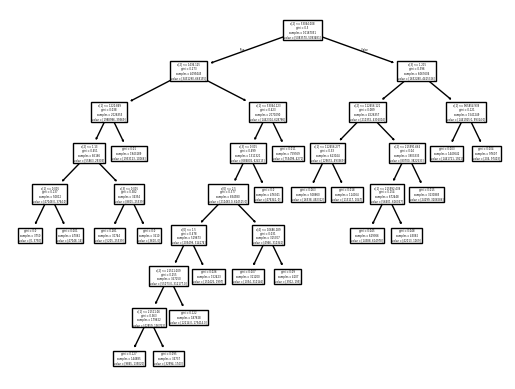

In [76]:
print(plot_tree(model))

In [77]:
accuracy_score(ytest,ypredict)

0.9895977713107005

In [83]:
CM=confusion_matrix(ytest,ypredict)
CM

array([[1249795,   21042],
       [   5398, 1265528]], dtype=int64)

<Axes: >

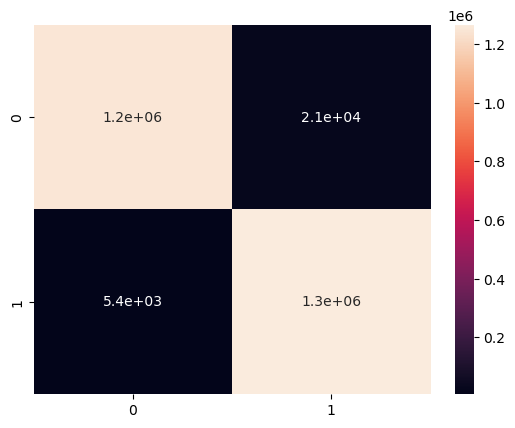

In [84]:
sns.heatmap(CM, annot=True)

In [85]:
import pickle

In [86]:
with open("online_payment_fraud.pkl","wb") as file:
    pickle.dump(model,file)

TypeError: file must have a 'write' attribute